<div class="alert alert-info"> <p2>
Привет! Меня зовут Позднякова Кристина. Я буду проверять твой проект. Предлагаю обращаться на «ты», но если так не удобно для тебя - дай знать, и мы перейдем на «вы»:). Моя основная цель проверки проекта — не просто указать на совершенные тобою ошибки, а поделиться своим опытом и помочь доработать код так, как хорошо было бы его писать в реальном рабочем проекте. Я вижу, что ты старался, делая проект. Все ключевые этапы в работе выполнены и соблюдены, так что в целом справиться с задачей тебе удалось. Работа получилась очень хорошая! 
</p2>
    <br>
    <br>
<p2>
Есть только несколько совсем небольших аспектов, которые требуют твоего внимания. Комментарии по ним помечены красным цветом (❌). После доработки, с учетом этих моментов, проект будет принят. Осталось совсем немного, буду ждать твою работу на повторное ревью:) Зелёным цветом (✔️) отмечены хорошие, удачные и элегантные решения, на которые можно опираться в будущих проектах. Из контекста будет более понятно что хорошо, а что просто великолепно!:) Жёлтым цветом (⚠️) выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). 
</p2>
    <br>
    <br>
<p2>
Давай работать над проектом взаимодействуя друг с другом: если ты что-то меняешь в проекте — пиши об этом, пожалуйста. Выбери для своих комментариев какой-то заметный цвет, отличный от выбранных мной, так мне будет легче отследить изменения. В названии моих комментариев будет номер версии начиная со второй. Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее:)  
</p2>
        <br>
    <br>
Хорошего дня:)
</div>

<div class="alert alert-info">
<b>Комментарий ревьюера v2</b>    <br> Привет) Нужно еще немного доработать)

<div class="alert alert-info">
<b>Комментарий ревьюера v2</b>    <br>
Привет) Работу принимаю. Я отметила ниже, что ошибки подправлены и оставила комментарии) <br>
У тебя хорошо получилось справиться с проектом! Желаю тебе удачи в стараниях и уверена что у тебя все получится!
<br>
<br>
Хорошего дня!:)

# Прогнозирование вероятности оттока пользователей для фитнес-центров

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. 

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Цель** — провести анализ и подготовить план действий по удержанию клиентов.

**Задачи:**
* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

  1) выделить целевые группы клиентов;
  
  2) предложить меры по снижению оттока;
    
  3) определить другие особенности взаимодействия с клиентами.

<div class="alert alert-success">
✔️ Хорошее вступление к проекту

## Изучение и предобработка файла данных 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime as dt
from scipy import stats as st
import math as mth

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage 

import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_colwidth", 200)

Запишем датасет в переменную df

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('gym_churn.csv')
    
pd.options.display.max_columns = 50

Посмотрим на первые 10 строк и общую информацию о датафрейме

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

In [4]:
numeric_cols = df[{'Contract_period', 'Age', 'Avg_additional_charges_total', 
                'Lifetime', 'Avg_class_frequency_total'}]

### Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:


* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.

В нашем расположении данные о 4000 клиентах сети фитнес-центров, включающие в себя 13 признаков и одна целевая переменная (*Churn*). Пропуски отсутствуют.

Проверим на наличие дубликатов:

In [5]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Дубликаты среди представленных данных отсутствуют

<div class="alert alert-success">
✔️ Хороший первичный обзор данных

### Матрица корреляций

In [6]:
fig = px.imshow(df.corr(), color_continuous_scale='hot', title='Матрица корреляций', aspect='equal')
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

Заметная сильная корреляция между средней частотой посещений в неделю за предыдущий месяц и средней частотой посещений в неделю за все время с начала действия абонемента, а также длительности текущего действующего абонемента и срока до окончания текущего действующего абонемента.

Во избежание дальнейших проблем с обученим моделей исключим мультиколлинеарные признаки.

In [7]:
df = df.drop(['Avg_class_frequency_current_month', 'Month_to_end_contract'], axis=1)

<div class="alert alert-success">
✔️❌ Да, верно. На матрице видна мультиколлинеарность. С ней нужно или поработать или как-то обосновать почему ее тут можно не удалять)

<div class="alert alert-info"> <b>Комментарий студента:</b> Избавился. Правда, теперь от этого поменялась ситуация с кластерами. Правильно ли теперь всё?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2</b>    <br>
✔️ Хорошо) Вообще в логистической регрессии автоматически стоит регуляризация l2, которая борется с влиянием мультиколлинеарности, а случайный лес не подвержен этому влиянию, но удаление это тоже хороший вариант)

### Средние значения и стандартные отклонения

In [8]:
df.describe().T

count        mean        std        min  \
gender                        4000.0    0.510250   0.499957   0.000000   
Near_Location                 4000.0    0.845250   0.361711   0.000000   
Partner                       4000.0    0.486750   0.499887   0.000000   
Promo_friends                 4000.0    0.308500   0.461932   0.000000   
Phone                         4000.0    0.903500   0.295313   0.000000   
Contract_period               4000.0    4.681250   4.549706   1.000000   
Group_visits                  4000.0    0.412250   0.492301   0.000000   
Age                           4000.0   29.184250   3.258367  18.000000   
Avg_additional_charges_total  4000.0  146.943728  96.355602   0.148205   
Lifetime                      4000.0    3.724750   3.749267   0.000000   
Avg_class_frequency_total     4000.0    1.879020   0.972245   0.000000   
Churn                         4000.0    0.265250   0.441521   0.000000   

                                    25%         50%         75%         max  
gender                         0.000000    1.000000    1.000000    1.000000  
Near_Location                  1.000000    1.000000    1.000000    1.000000  
Partner                        0.000000    0.000000    1.000000    1.000000  
Promo_friends                  0.000000    0.000000    1.000000    1.000000  
Phone                          1.000000    1.000000    1.000000    1.000000  
Contract_period                1.000000    1.000000    6.000000   12.000000  
Group_visits                   0.000000    0.000000    1.000000    1.000000  
Age                           27.000000   29.000000   31.000000   41.000000  
Avg_additional_charges_total  68.868830  136.220159  210.949625  552.590740  
Lifetime                       1.000000    3.000000    5.000000   31.000000  
Avg_class_frequency_total      1.180875    1.832768    2.536078    6.023668  
Churn                          0.000000    0.000000    1.000000    1.000000

Данные выглядят вполне правдоподобно и значения попадают под описание.

Из них можно составить портрет "среднестатистического" пользователя: мужчина? (1% перевеса) возрастом 29 лет, проживающий или работающий недалко от фитнес-центра, с около 50% вероятностью являющийся сотрудником компании-партнёра клуба, который предоставил телефон для связи, длительность контракта на посещение спорт-зала которого составляет 6 месяцев и не посещающий групповые занятия.

<div class="alert alert-warning"> 
⚠️ Хорошее место описать «среднестатистического» клиента

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за совет. Составил</div>

<div class="alert alert-warning"> <b>Комментарий ревьюера v2</b>    <br>
⚠️ Некоторые моменты слишком категоричны, для среднего значения (длительность посещения и групповые занятия), а так окей)

### Гистограммы и распределения признаков

In [9]:
clusters = df.groupby(['Churn'], as_index=False).agg('mean')
clusters

Churn    gender  Near_Location   Partner  Promo_friends     Phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   
1         1.728558      0.268615  26.989632                    115.082899   

   Lifetime  Avg_class_frequency_total  
0  4.711807                   2.024876  
1  0.990575                   1.474995

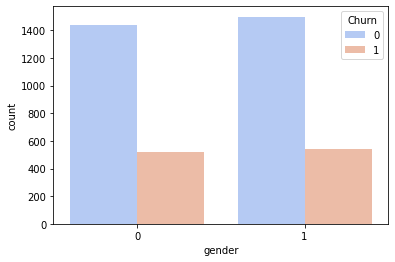

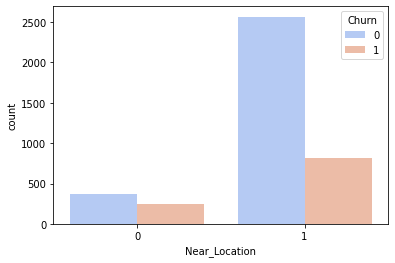

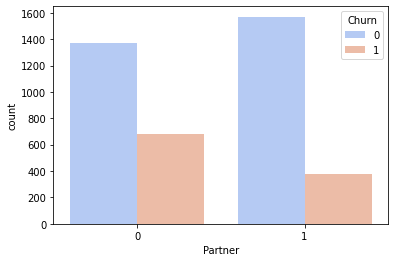

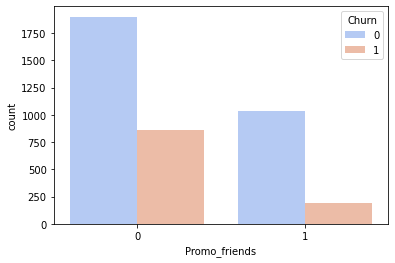

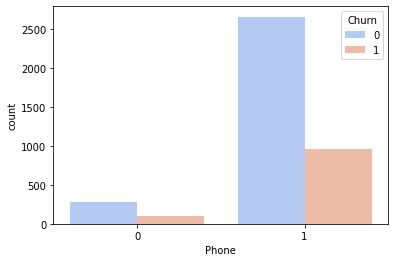

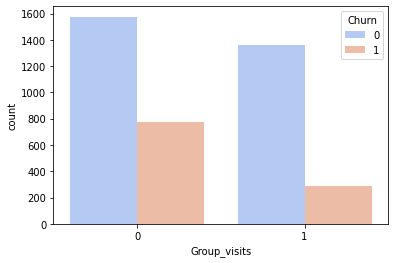

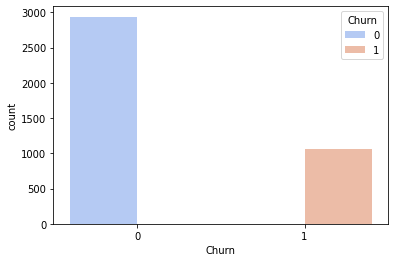

In [10]:
# категориальные значения
for col in df.drop(numeric_cols, axis=1).columns:
    sns.countplot(x=col, data=df, hue='Churn', palette='coolwarm')
    plt.show()

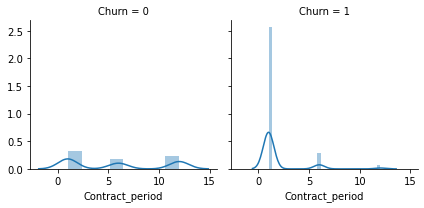

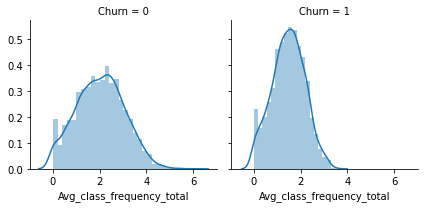

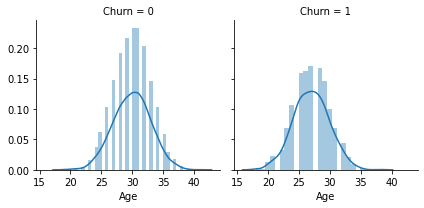

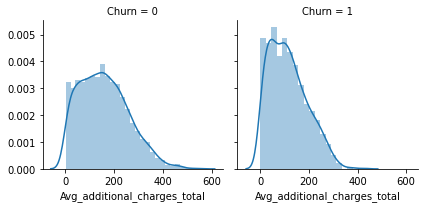

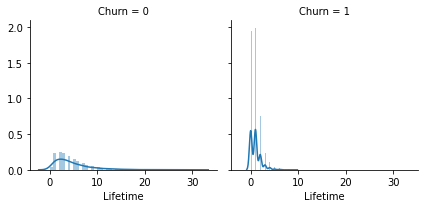

In [11]:
# Количественные поля
for col in numeric_cols.columns:
    t = sns.FacetGrid(df, col='Churn')
    t.map(sns.distplot, col)

**Выводы:**

* Клиенты пришедшие в рамках акции "приведи друга" с большей вероятностью остаются клиенами на более длительный срок. Стоит попробовать устраивать больше таких акций. Те, кто итак являются клиентами фитнес-центра приводят друзей и впоследствии "тянут" друг друга заниматься;
* Средняя длительность контракта влияет на уход клиента. Возможно, когда срок контракта подходит к концу следует сделать небольшую скидку на продление;
* Факт посещения групповых тренировок также влияет на то, как долго клиент остаётся. Это подтверждает первый довод с акцией "приведи друга". "Мы с Тамарой ходим парой" :)
* Клиенты в меньшей степени уходят, если посещают кафе, массажные салоны, покупают снаряжение при фитнес-центре.

<div class="alert alert-success">
✔️ Отлично, уже вырисовываются портреты ненадежного и надежного клиентов

## Модель прогнозирования оттока клиентов

### Разбиение данных на обучающую и валидационную выборку

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-success">
✔️ Сделано верно

### Обучение модели на train-выборке

In [13]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#### Логистическая регрессия

In [14]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
lr_predictions = model.predict(X_test)
lr_probabilities = model.predict_proba(X_test)[:, 1]
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели лигистической регрессии:'
)

Метрики для модели лигистической регрессии:
	Accuracy: 0.89
	Precision: 0.82
	Recall: 0.81
	F1: 0.81
	ROC_AUC: 0.96


#### Случайный лес

In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.82
	Recall: 0.79
	F1: 0.80
	ROC_AUC: 0.94


**Выводы:**

Случайный лес показывает более высокие показатели метрик

<div class="alert alert-warning">
⚠️❌ А у меня при перезапуске блокнота оказалось наоборот

<div class="alert alert-info"> <b>Комментарий студента:</b> Действительно. Странно, у меня лучшие показатели были у случайного леса. Перезапустил ещё раз - вперёд вышла логистическая регрессия. UPD: после устранения мультиколлинеарности случайный лес снова рулит)</div>

<div class="alert alert-warning"> 
⚠️ Дело в том, что ты не поставил random_state в LogisticRegression, вот результат и отличается каждый раз)

## Кластеризация клиентов

In [16]:
# Стандартизируем данные

sc = StandardScaler()
x_sc = sc.fit_transform(df)

linked = linkage(x_sc, method = 'ward') 

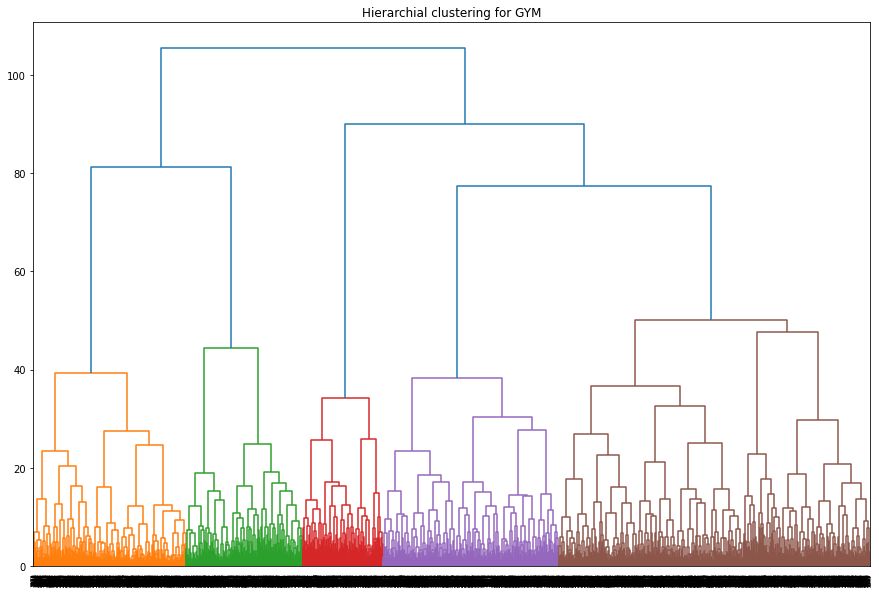

In [17]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

In [18]:
# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df.groupby(['cluster_km']).agg('mean').reset_index().sort_values(by='Churn', ascending=True)
display(clusters.T)

1           3           2           0  \
cluster_km                      1.000000    3.000000    2.000000    0.000000   
gender                          0.522936    0.502627    0.503205    0.501661   
Near_Location                   0.999083    0.984238    0.992521    0.000000   
Partner                         0.161468    0.626970    0.916667    0.481728   
Promo_friends                   0.074312    0.000000    1.000000    0.071429   
Phone                           0.902752    0.900175    0.903846    0.911960   
Contract_period                 2.068807   10.623468    7.827991    2.872093   
Group_visits                    0.450459    0.492119    0.544872    0.224252   
Age                            30.055963   29.996497   29.950855   28.652824   
Avg_additional_charges_total  157.510111  164.623351  159.006129  135.994298   
Lifetime                        4.833945    4.654991    4.708333    2.976744   
Avg_class_frequency_total       2.043382    2.035830    2.011738    1.754128   
Churn                           0.001835    0.005254    0.011752    0.408638   

                                       4  
cluster_km                      4.000000  
gender                          0.513109  
Near_Location                   1.000000  
Partner                         0.330836  
Promo_friends                   0.217228  
Phone                           0.900125  
Contract_period                 1.682896  
Group_visits                    0.289638  
Age                            26.922597  
Avg_additional_charges_total  114.095697  
Lifetime                        0.965044  
Avg_class_frequency_total       1.482348  
Churn                           0.997503

<div class="alert alert-success">
❌ Какие отличительные черты кластеров?   <br>
  Чем отличаются подверженные оттоку кластеры?<br>
  Что характеризует надежные кластеры?<br>
   Какие-то из этих выводов вписать в общий

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил</div>

<div class="alert alert-success"><b>Комментарий ревьюера v2</b>    <br>
❌ Кажется у них все же чуть больше отличительных признаков, чем 1) Давай поищем еще? Минимум 5 различий

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2</b>    <br>
✔️ Отлично

In [19]:
numeric_cols = ['Contract_period', 'Age', 'Avg_additional_charges_total', 
                'Lifetime', 'Avg_class_frequency_total']

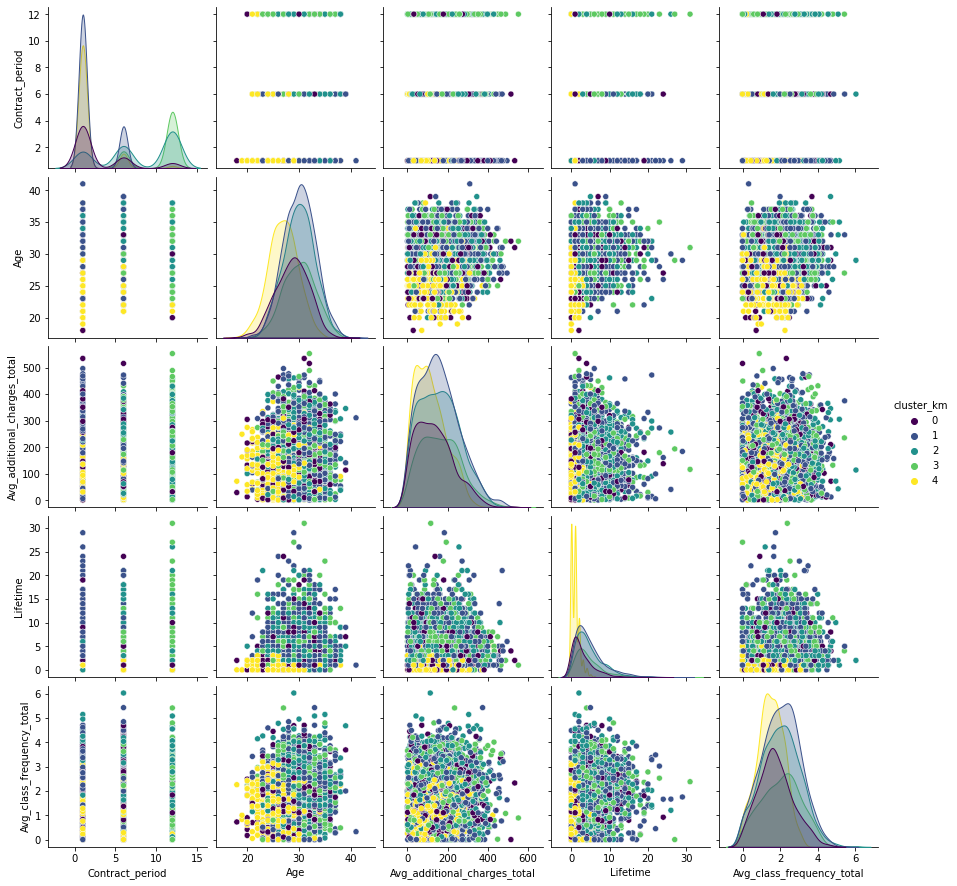

In [23]:
t = sns.pairplot(df[numeric_cols + ['cluster_km']], hue='cluster_km', palette="viridis", diag_kind='kde', height=2.5)

<div class="alert alert-success">
✔️❌ Какие выводы можно сделать из графиков?

<div class="alert alert-info"> <b>Комментарий студента:</b> Честно говоря, очень сложно разобрать что-то. Слишком меленькие точки и большая плотнасть. И у меня небольшая проблема со зрением - я плохо различаю на картинках оранжевый и зелёный</div>

<div class="alert alert-success"><b>Комментарий ревьюера v2</b>    <br>
✔️❌ Ты можешь решулировать размер изображения и цвет на графиках) Если у тебя такая проблема, нужно особоенно это уметь делать, на работе же придется какие-то выводы делать) Плюс ты можешь выбрать другие виды графиков

<div class="alert alert-success">
<b>Комментарий ревьюера v2</b>    <br>
✔️ 👍

**Выводы:**

Наиболее подвержены к уходу клиенты 5 кластера. Наиболее надёжные - 2, 4, 3, 1.

Отличительная черта ненадёжных клиентов - время с момента первого обращения в фитнес-центр. Если для 5 кластера среднее значение этого показателя 0.96, то для более надёжных - 4.7. Можно сказать, что клиент в большей степени становится надёжным, когда преодолевает барьер в посещении фитнес-клуба в ~28 дней. Иначе говоря, формируется привычка. Также надёжные клиенты тратят больше денег на снаряжение, питание, массаж, а также имеют более длительный контракт и посещают тренировки более чаще. Помимо прочего реже посещают групповые тренировки.

<div class="alert alert-warning"> 
⚠️ Немного нелогично, что дендрограмма тут, обычно сначала рисуется она и на ее основе происходит кластеризация

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, перенёс</div>

## Общий вывод

По итогу анализа данных проделана предобработка данных, построены матрицы корреляций, графики распределения признаков. Построены модели прогнозирования оттока клиентов (логистическая регрессия и случайный лес). На основе таких метрик, как accuracy, precision, recall, F1 и ROC_AUC определена лучшая модель обучения - логистическая регрессия.

Далее проведена кластеризация пользователей, которая позволила определить долю оттока каждого из кластеров. Наибольшая степень ухода у клиентов 5 кластера. Отличительная черта ненадёжных клиентов - время с момента первого обращения в фитнес-центр. Если для 5 кластера среднее значение этого показателя 0.96, то для более надёжных - 4.7. Можно сказать, что клиент в большей степени становится надёжным, когда преодолевает барьер в посещении фитнес-клуба в ~28 дней. Иначе говоря, формируется привычка. Также надёжные клиенты тратят больше денег на снаряжение, питание, массаж, а также имеют более длительный контракт и посещают тренировки более чаще. Помимо прочего реже посещают групповые тренировки.  

Рекомендации сети фитнес-центров:

* Клиенты пришедшие в рамках акции "приведи друга" с большей вероятностью остаются клиенами на более длительный срок. Стоит попробовать устраивать больше таких акций. Те, кто итак являются клиентами фитнес-центра приводят друзей и впоследствии "тянут" друг друга заниматься;
* Средняя длительность контракта влияет на уход клиента. Возможно, когда срок контракта подходит к концу следует сделать небольшую скидку на продление;
* Факт посещения групповых тренировок также влияет на то, как долго клиент остаётся. Это подтверждает первый довод с акцией "приведи друга". "Мы с Тамарой ходим парой" :)
* Клиенты в меньшей степени уходят, если посещают кафе, массажные салоны, покупают снаряжение при фитнес-центре. Клиенту, у которого есть есть снаряжение не так просто дастся решение прекратить тренировки. Следует попробовать дать перснональные скидки на снаряжение или массаж.

P.S. Заранее прошу прощение за качество проекта. Немного плохо себя чувствовал да и скорый дедлайн нагнетает ко всему прочему. Постарался сделать всё максимально понятно, но чувствую, что что-то не так :(

<div class="alert alert-success">
✔️ Ничего, хорошее качество проекта) 
Рекомендации тоже даны важные, теперь у коллег-маркетологов будет много данных для работы)

<div class="alert alert-info"> <p2>
Работа хороша! Я вижу, что ты хорошо разбираешься в теме. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Осталось несколько небольших деталей, которые нужно исправить:

1. Поработать с мультиколлинеарностью
2. Поработать с обучением моделей
3. Подправить выводы 
    
Буду ждать работу :)
</p2>
</div>